In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import bm3d
import kornia
import random
manualSeed = 303
random.seed(manualSeed)
torch.manual_seed(manualSeed)

In [16]:

mae_loss = nn.L1Loss()
mse_loss = nn.MSELoss()


psnr_2 = 0
mae_2 = 0
mse_2 = 0
ssim_2 = 0

i = 40
ch = 1
for iter, x in enumerate(test_loader):
    x = x.view(-1, ch, image_size, image_size)
    x_noise = []
    x_noise = (np.array(add_noise("speckle",x).float()).clip(0,1)*255).astype('uint8').reshape((-1,128,128,ch))
    
    pred_bm3d = []
    for k in range(len(x_noise)):
        pred_bm3d_ = bm3d.bm3d(x_noise[k].reshape(128,128,1), sigma_psd=40)/255.
    
        pred_bm3d.append(pred_bm3d_)
        
    pred_bm3d = np.array(pred_bm3d).reshape(-1,ch,128,128)
    pred_bm3d = torch.Tensor(pred_bm3d)


    psnr_2 += PSNR(pred_bm3d, x)/len(test_loader)
    mae_2 += mae_loss(pred_bm3d, x)/len(test_loader)
    mse_2 += mse_loss(pred_bm3d, x)/len(test_loader)
    ssim_2 += (kornia.metrics.ssim(pred_bm3d, x, window_size=11).mean())
               
ssim_2 = ssim_2/len(test_loader)

print("BM3D Filter")
print("PSNR : {:1f}, MAE : {:1f}, MSE : {:1f}, SSIM : {:1f}".format(psnr_2, mae_2, mse_2, ssim_2))

BM3D Filter
PSNR : 32.028124, MAE : 0.017690, MSE : 0.000631, SSIM : 0.879861


In [17]:
ch = 1
original_x = test_dataset[7] # 42
print(original_x.shape)
noise_xx = (np.array(add_noise("speckle",original_x).float()).clip(0,1)*255).astype('uint8').reshape((128,128,ch))
print(noise_xx.shape)
print(noise_xx.max())
pred_bm3d_ = bm3d.bm3d(noise_xx, sigma_psd=40)/255.

original_x = np.array(original_x).reshape((ch,image_size,image_size))
noise_x = np.array(noise_xx).reshape((ch,image_size,image_size))
pred_bm3d_ = np.array(pred_bm3d_).reshape((ch,image_size,image_size))

torch.Size([1, 128, 128])
(128, 128, 1)
255


(-0.5, 127.5, 127.5, -0.5)

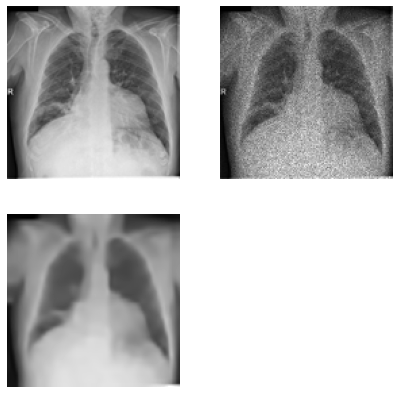

In [18]:
plt.figure(figsize=(7, 7))
plt.subplot(221)
plt.imshow(original_x.transpose(1,2,0), cmap='gray')
plt.axis('off')

plt.subplot(222)
plt.imshow(noise_x.transpose(1,2,0), cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.imshow(pred_bm3d_.transpose(1,2,0), cmap='gray')
plt.axis('off')
